## Examples for decision tree visualization using `animl`

In [1]:
import IPython, graphviz
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_diabetes
from collections import defaultdict
import sys
sys.path.append('../')
from animl.trees import *
from animl.viz.trees import *

### Simple classifier

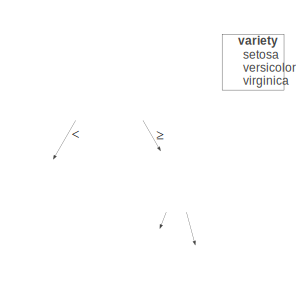

In [2]:
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

st = dtreeviz(classifier, iris.data, iris.target, target_name='variety',
              feature_names=iris.feature_names, class_names=["setosa", "versicolor", "virginica"] )
              
g = graphviz.Source(st)
g

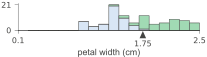

In [4]:
display(IPython.display.SVG('/var/folders/56/k6mpdwg50hx664tkjk_t08nc0000gn/T/node2.svg'))

In [33]:
def display_graph(g, format='svg', include_asset_exists=False):
    """
    Display a TermGraph interactively from within IPython.
    """
    try:
        import IPython.display as display
    except ImportError:
        raise NoIPython("IPython is not installed.  Can't display graph.")
 
    if format == 'svg':
        display_cls = display.SVG
    elif format in ("jpeg", "png"):
        display_cls = partial(display.Image, format=format, embed=True)
 
    out = BytesIO()
    _render(g, out, format, include_asset_exists=include_asset_exists)
    return display_cls(data=out.getvalue())

In [39]:
display_graph(g, format='png')

NameError: name 'partial' is not defined

### Simple regressor

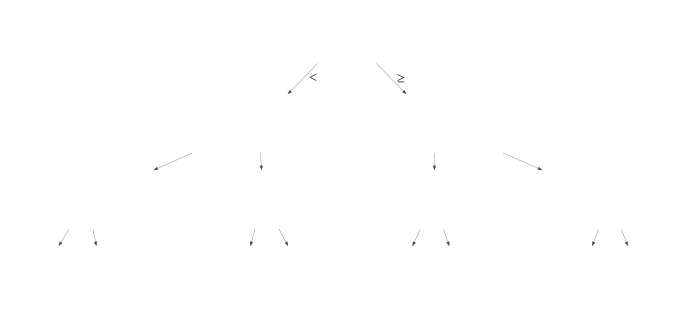

In [14]:
regr = tree.DecisionTreeRegressor(max_depth=3)  # limit depth of tree
boston = load_boston()
regr.fit(boston.data, boston.target)

st = dtreeviz(regr, boston.data, boston.target, target_name='price',
              feature_names=boston.feature_names)
display(graphviz.Source(st))
# g = graphviz.Source(st, format='pdf')
# g.view()  

In [20]:
regr = tree.DecisionTreeRegressor(max_depth=3)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

st = dtreeviz(regr, diabetes.data, diabetes.target, target_name='value',
              feature_names=diabetes.feature_names, X=X)
              
g = graphviz.Source(st, format='pdf')
g.view()  

'Source.gv.pdf'

In [15]:
diabetes = load_diabetes()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from animl.viz.trees import dtreeviz
import graphviz

In [22]:
from sklearn.datasets import load_breast_cancer

In [25]:
classifier = tree.DecisionTreeClassifier(max_depth=4)  # limit depth of tree
cancer = load_breast_cancer()
classifier.fit(cancer.data, cancer.target)

# need class_names for classifier
st = dtreeviz(classifier, cancer.data, cancer.target, target_name='cancer',
              feature_names=cancer.feature_names, class_names=["malignant", "benign"], fancy=False )
              
g = graphviz.Source(st, format='pdf')
g.view()  

'Source.gv.pdf'

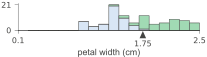

In [45]:
display(IPython.display.SVG('/var/folders/56/k6mpdwg50hx664tkjk_t08nc0000gn/T/node2.svg'))

In [70]:
filename = g.render(filename='img/g.dot')

In [97]:
! ls

Source.gv
Source.gv.pdf
Untitled.ipynb
boston.pdf
boston.pdf.pdf
classification_tree_with_histograms.ipynb
histogram.ipynb
img
iris.pdf
iris.pdf.pdf
output.svg
tree.ipynb


In [82]:
# ! dot -Tpng img/g.dot > img/output.png

In [59]:
from IPython.display import SVG
nested_svg="""
<svg xmlns="http://www.w3.org/2000/svg">
  <svg x="0">
    <rect x="10" y="50" height="80" width="80" style="fill: #0000ff"/>
  </svg>
  <svg x="100">
    <rect x="10" y="10" height="100" width="80" style="fill: #00cc00"/>
  </svg>
</svg>"""
SVG(nested_svg)